FIAP - Challenge TOTVS 2025

Sprint 3 - Deep Learning

Grupo Cluster Vision


Anna Paula Carbone
RM: 558152

Eduardo Ferreira
RM: 555610

Gabriel Mariotto
RM: 557816

Gabriel Moretim
RM: 557740

Guilherme Panfiete
RM: 557758

# Importações

In [2]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from yellowbrick.cluster import KElbowVisualizer

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../dados/dados_totvs/telemetria_1.csv')

In [4]:
for i in range(2, 12):
    proximo_df = pd.read_csv(f'../dados/dados_totvs/telemetria_{i}.csv')
    df = pd.concat([df, proximo_df], ignore_index=True)

# Análise Exploratória

In [4]:
df.sample(10)

,clienteid,eventduration,moduloid,productlineid,referencedatestart,slotid,statuslicenca,tcloud,clienteprime
7237921,TEZFE600,0.000,738,9,2025-03-20,4050,Desconectado,NaN,NaN
11152318,TEZKQ500,999.000,533,3,2025-03-21,533,Desconectado,NaN,NaN
27754222,T4645700,240.000,534,3,2025-03-17,534,Desconectado,NaN,NaN
10588215,TFCZN500,0.000,99,2,2025-03-21,0,Desconectado,NaN,NaN
18075899,TFDAIL00,60.000,726,9,2025-03-19,3502,Desconectado,NaN,NaN
6721604,TFCZR800,369.730,534,3,2025-03-20,4029,Desconectado,NaN,NaN
17468943,T7659000,17660.877,4007,0,2025-03-18,4007,Desconectado,NaN,NaN
20043159,TEXSQA00,567.292,5,2,2025-03-17,4024,Desconectado,NaN,NaN
25525674,T1334700,2047.552,5,2,2025-03-20,4000,Desconectado,NaN,NaN
7391870,T8454700,48.688,5625,6,2025-03-19,4000,Desconectado,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30804197 entries, 0 to 30804196
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   clienteid           object 
 1   eventduration       float64
 2   moduloid            int64  
 3   productlineid       int64  
 4   referencedatestart  object 
 5   slotid              int64  
 6   statuslicenca       object 
 7   tcloud              float64
 8   clienteprime        float64
dtypes: float64(3), int64(3), object(3)
memory usage: 2.1+ GB


In [6]:
df.describe()

,eventduration,moduloid,productlineid,slotid,tcloud,clienteprime
count,3.080420e+07,3.080420e+07,3.080420e+07,3.080420e+07,0.0,0.0
mean,9.481614e+04,1.332397e+03,3.926096e+00,2.021728e+03,NaN,NaN
std,5.593423e+07,1.908966e+03,2.783371e+00,1.797231e+03,NaN,NaN
min,-8.118190e+05,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN
25%,1.065100e+01,5.160000e+02,3.000000e+00,5.330000e+02,NaN,NaN
50%,1.979410e+02,5.330000e+02,3.000000e+00,5.340000e+02,NaN,NaN
75%,1.025913e+03,7.220000e+02,6.000000e+00,4.001000e+03,NaN,NaN
max,1.236955e+11,7.505000e+03,9.900000e+01,6.500000e+03,NaN,NaN


In [7]:
percentual_nulos = df.isnull().mean() * 100
percentual_nulos

clienteid               0.000000
eventduration           0.000000
moduloid                0.000000
productlineid           0.000000
referencedatestart      0.000000
slotid                  0.000000
statuslicenca           0.036063
tcloud                100.000000
clienteprime          100.000000
dtype: float64

In [8]:
df = df.drop(['tcloud', 'clienteprime', 'referencedatestart'], axis=1)

In [9]:
df.columns

Index(['clienteid', 'eventduration', 'moduloid', 'productlineid', 'slotid',
       'statuslicenca'],
      dtype='object')

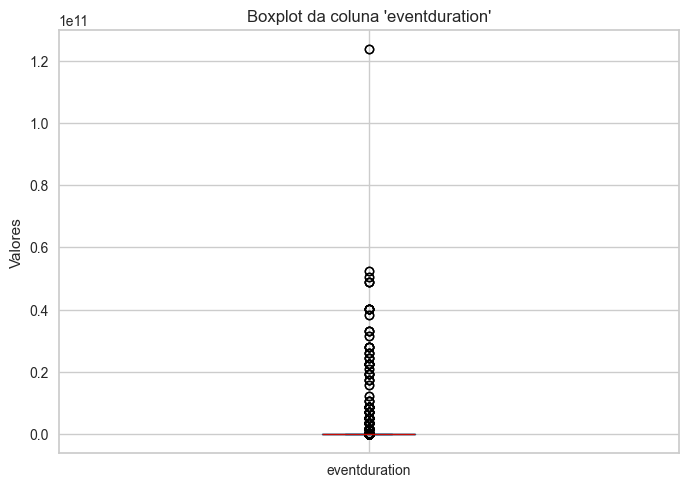

In [10]:
# Boxplot da duração
df["eventduration"].plot.box()

plt.title("Boxplot da coluna 'eventduration'")
plt.ylabel("Valores")
plt.show()

In [11]:
# Substituindo valores negativos pela mediana dos valores positivos

mediana_positivos_tempo = df.loc[df["eventduration"] > 0, "eventduration"].median()

df.loc[df["eventduration"] <= 0, "eventduration"] = mediana_positivos_tempo

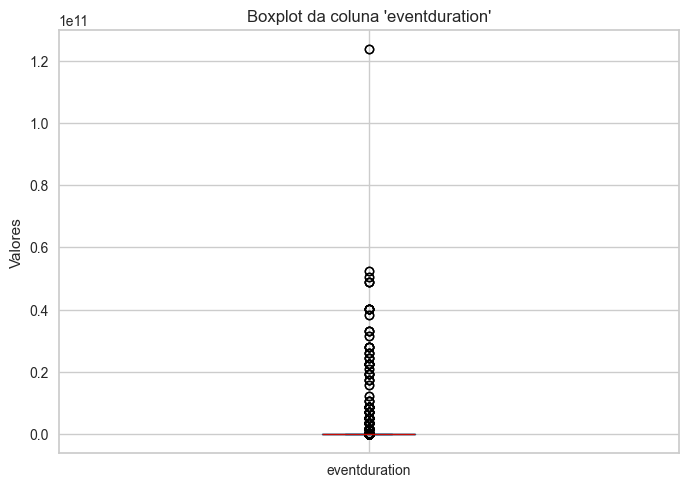

In [12]:
# Boxplot da duração
df["eventduration"].plot.box()

plt.title("Boxplot da coluna 'eventduration'")
plt.ylabel("Valores")
plt.show()

In [13]:
# Suavizando outliers
Q1 = df["eventduration"].quantile(0.25)
Q3 = df["eventduration"].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5*IQR
limite_superior = Q3 + 1.5*IQR

# Substituir outliers pelos limites
df["eventduration"] = df["eventduration"].clip(lower=limite_inferior, upper=limite_superior)

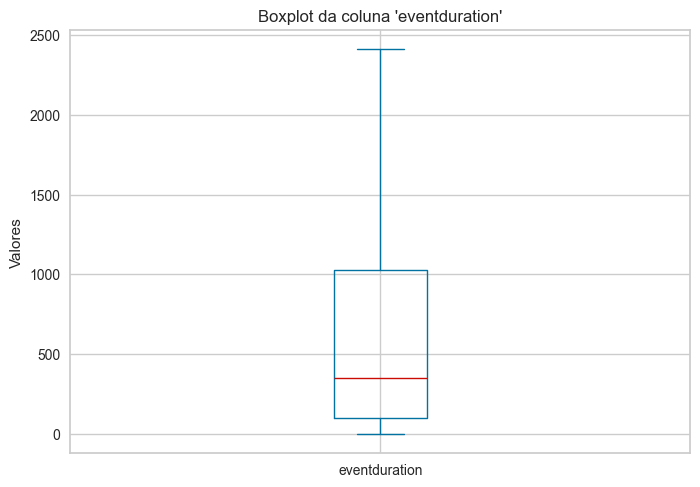

In [14]:
# Boxplot da duração
df["eventduration"].plot.box()

plt.title("Boxplot da coluna 'eventduration'")
plt.ylabel("Valores")
plt.show()

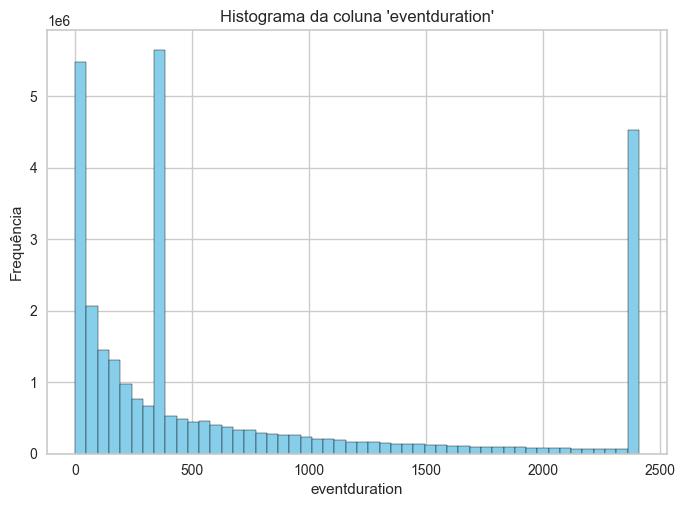

In [15]:
# Plotar histograma da duração do atendimento
plt.hist(df["eventduration"], bins=50, color="skyblue", edgecolor="black")
plt.xlabel("eventduration")
plt.ylabel("Frequência")
plt.title("Histograma da coluna 'eventduration'")
plt.show()

In [16]:
df = df.drop('eventduration', axis=1)

In [17]:
# Visualizando valores únicos de cada coluna

In [18]:
df['clienteid'].nunique()

4465

In [19]:
df['statuslicenca'].nunique()

3

In [20]:
df['statuslicenca'].unique()

array(['Desconectado', nan, 'Conectado', 'Negado'], dtype=object)

In [21]:
df['slotid'].nunique()

339

In [22]:
df['productlineid'].nunique()

12

In [23]:
df['moduloid'].nunique()

535

In [24]:
df[df['clienteid'] == 'T0100800']['slotid'].value_counts()

slotid
4016    1256
0        298
4134       8
4092       4
Name: count, dtype: int64

In [25]:
df[df['clienteid'] == 'T0100800']['productlineid'].value_counts()

productlineid
2    1562
0       4
Name: count, dtype: int64

In [26]:
df[df['clienteid'] == 'T0100800']['moduloid'].value_counts()

moduloid
5       586
2       287
6       177
78      150
9       139
4093    106
34       30
99       30
39       25
84       22
4        10
4092      4
Name: count, dtype: int64

<Axes: xlabel='moduloid'>

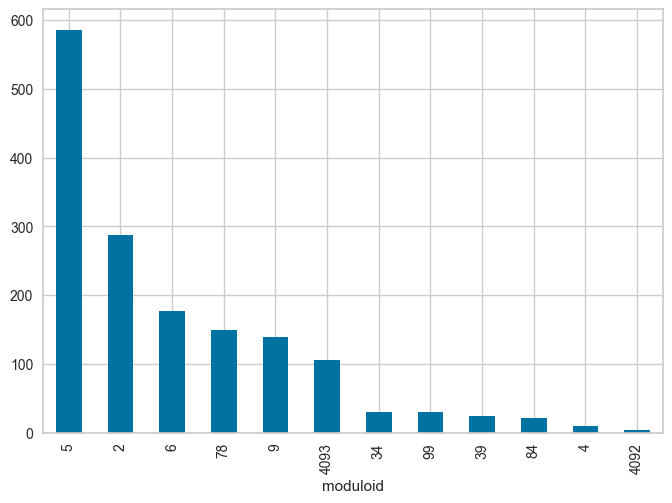

In [27]:
df[df['clienteid'] == 'T0100800']['moduloid'].value_counts().plot(x="moduloid", y="count", kind="bar")

In [28]:
df[df['clienteid'] == 'T0100800']['statuslicenca'].value_counts()

statuslicenca
Desconectado    1518
Negado            40
Name: count, dtype: int64

In [29]:
df.columns

Index(['clienteid', 'moduloid', 'productlineid', 'slotid', 'statuslicenca'], dtype='object')

In [30]:
# Análise da relação entre as colunas de id dos produtos

df_moduloid = df.groupby('moduloid').agg({'productlineid': 'nunique', 'slotid': 'nunique'}).reset_index()
df_moduloid

,moduloid,productlineid,slotid
0,0,1,1
1,1,1,9
2,2,1,26
3,3,1,5
4,4,1,21
...,...,...,...
530,6944,1,2
531,6945,1,3
532,7503,1,1
533,7504,1,2


In [31]:
df_productlineid = df.groupby('productlineid').agg({'moduloid': 'nunique', 'slotid': 'nunique'}).reset_index()
df_productlineid

,productlineid,moduloid,slotid
0,0,17,34
1,1,61,30
2,2,100,144
3,3,31,72
4,6,177,81
5,8,46,13
6,9,40,14
7,11,36,36
8,12,1,6
9,13,24,24


In [32]:
df_slotid = df.groupby('slotid').agg({'productlineid': 'nunique', 'moduloid': 'nunique'}).reset_index()
df_slotid

,slotid,productlineid,moduloid
0,0,8,144
1,1,1,1
2,2,1,1
3,3,1,1
4,4,1,1
...,...,...,...
334,5722,1,1
335,5779,1,1
336,5783,1,1
337,5981,1,1


É possível estasbelecer uma certa hierarquia entre os diferentes ids de produtos: moduloid pertence a um productlineid, enquanto que cada slotid pertence, majoritariamente, a um moduloid e a um productlineid, mas essa relação não é direta

# Preparando os dados para clusterização

In [33]:
# Conmvetendo o código da loja em código do cliente (removendo últiumos 2 dígitos)
df['clienteid'] = df['clienteid'].str[:-2]

In [34]:
# Definindo função de agregação pela moda

def agg_moda(x):
    m = x.dropna().mode()
    if not m.empty:
        return m.iloc[0]
    return np.nan

In [35]:
# Criando coluna para contagem de casos

df['contagem'] = 1

In [36]:
# Agrupando o df por cliente

df_agrupado = df.groupby('clienteid').agg({
                             'moduloid': agg_moda,
                             'productlineid': agg_moda,
                             'slotid': agg_moda,
                             'statuslicenca': agg_moda,
                             'contagem': 'count'}).reset_index()

In [37]:
df_agrupado.columns = ['clienteid',
                       'moduloid_moda',
                       'productlineid_moda',
                       'slotid_moda',
                       'statuslicenca_moda',
                       'contagem']

In [38]:
df_agrupado

,clienteid,moduloid_moda,productlineid_moda,slotid_moda,statuslicenca_moda,contagem
0,T00053,5553,6,4000,Desconectado,4400
1,T00082,5629,6,4004,Desconectado,3103
2,T00145,5,2,4000,Desconectado,1022
3,T00245,5,2,4000,Desconectado,303
4,T00255,516,3,0,Desconectado,1261
...,...,...,...,...,...,...
4460,TFEE30,9,2,4134,NaN,4
4461,TFEE44,22,2,4027,Desconectado,131
4462,TFEE47,534,3,4001,Desconectado,10376
4463,TFEEAA,99,2,0,Desconectado,8


In [39]:
df_agrupado_2 = df_agrupado.copy()

In [40]:
# Frequency encoding da coluna 'statuslicenca_moda'

# Preenchendo valores nulos
df_agrupado["statuslicenca_moda"].fillna("Desconhecido", inplace=True)

# Contar frequência
freq = df_agrupado["statuslicenca_moda"].value_counts() / len(df_agrupado)

# Mapear frequência de volta para a coluna
df_agrupado["statuslicenca_moda_encoded"] = df_agrupado["statuslicenca_moda"].map(freq) 

C:\Users\gxmar\AppData\Local\Temp\ipykernel_23128\164437551.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_agrupado["statuslicenca_moda"].fillna("Desconhecido", inplace=True)


In [41]:
df_agrupado = df_agrupado.drop('statuslicenca_moda', axis=1)

In [42]:
df_agrupado.columns

Index(['clienteid', 'moduloid_moda', 'productlineid_moda', 'slotid_moda',
       'contagem', 'statuslicenca_moda_encoded'],
      dtype='object')

In [43]:
# Normalizando as colunas

colunas_a_normalizar = df_agrupado.columns.tolist()
colunas_a_normalizar.remove('clienteid')
scaler = MinMaxScaler()
df_agrupado[colunas_a_normalizar] = scaler.fit_transform(df_agrupado[colunas_a_normalizar])

# Definindo o número de clusters

In [44]:
# Função para exibir as diferentes avaliações para o número de clusters

def define_numero_clusters(x):
    # Elbow method
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(1,30))
    visualizer.fit(x)
    visualizer.show()

    # Silhouette method
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(2,30), metric='silhouette', timings=True)
    visualizer.fit(x)
    visualizer.show()

    # Calinski harabaz method
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(2,30), metric='calinski_harabasz', timings=True)
    visualizer.fit(x)
    visualizer.show()

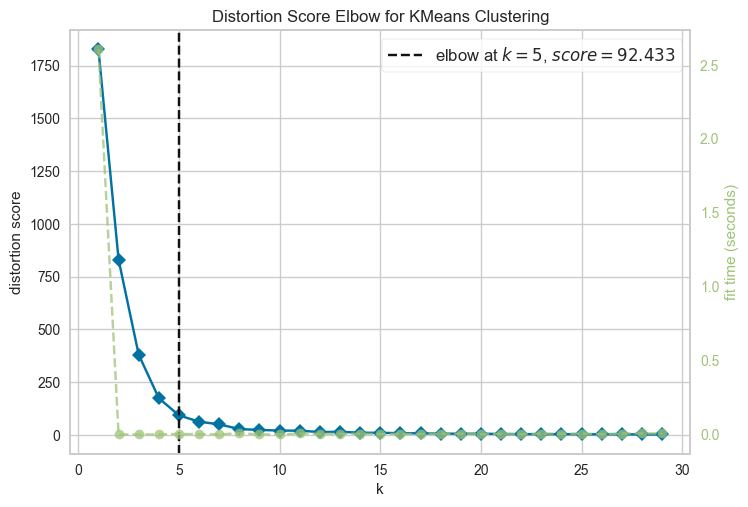

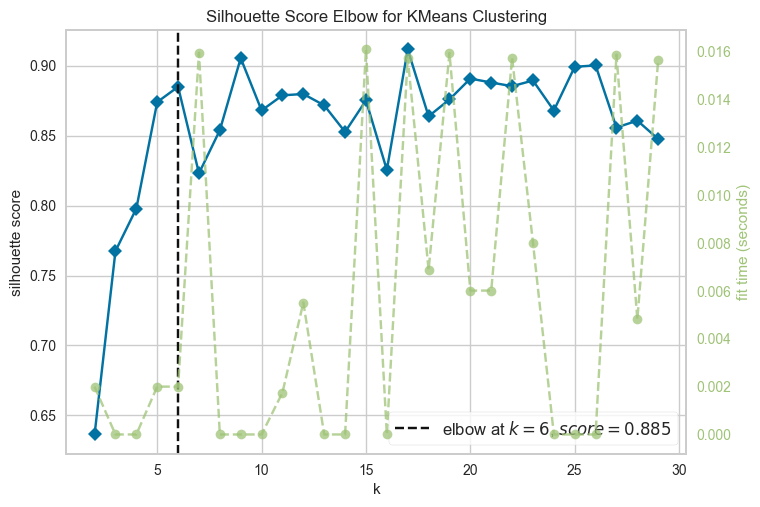

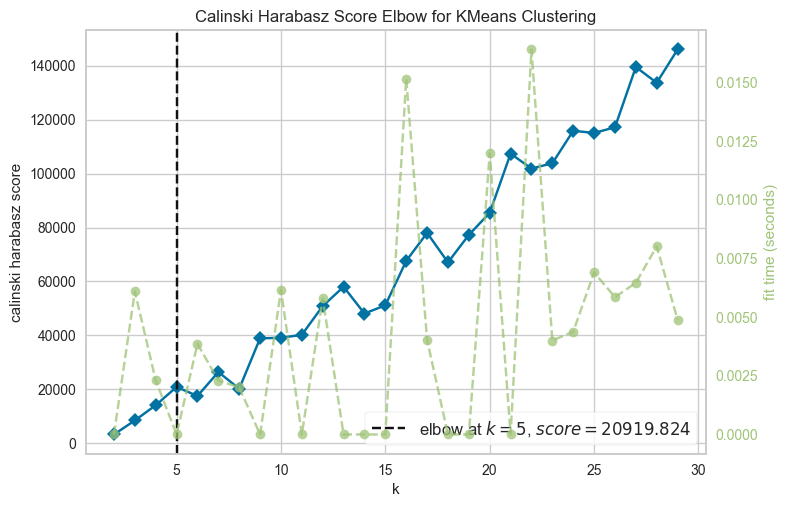

In [45]:
features = df_agrupado.columns.tolist()
features.remove('clienteid')

x = df_agrupado[features].values

define_numero_clusters(x)

# Clusterização com Kmeans

In [46]:
# Função para clusterazação com kmeans

def clusterização_kmeans(k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    labels = kmeans.labels_
    cluster_pred = kmeans.predict(x)
    cluster_centres = kmeans.cluster_centers_

    return kmeans, labels, cluster_pred, cluster_centres

# Avaliação da Clusterização

In [47]:
# Função para avaliadção da clusterização

def avaliacao_clusterizacao(labels):
    # Scores
    score = silhouette_score(x, labels)
    db_index = davies_bouldin_score(x, labels)
    ch_index = calinski_harabasz_score(x, labels)

    return score, db_index, ch_index


In [48]:
# Função para alimentar dataframe da avaliação da clusterização

def alimenta_df_avaliacao_clusterizacao(df_avaliacao, k, score, db_index, ch_index):
    df_avaliacao.loc[len(df_avaliacao)] = [k, score, db_index, ch_index]

In [49]:
# Função para visualização dos clusters

def visualiza_clusters(x, labels, k):
    #PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(x)
    plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='Set2', s=50)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("Clusters (PCA)")
    plt.show()

    # TSNE
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(x)
    plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels, cmap='Set2', s=50)
    plt.title("Clusters (t-SNE)")
    plt.show()

In [50]:
# Função para visualização da distribuiçlão dos valores de cada coluna por cluster

def visualiza_colunas_por_cluster(df, k):

    colunas_graficos = ['moduloid_moda', 'productlineid_moda', 'slotid_moda', 'statuslicenca_moda']

    for coluna in colunas_graficos:
        
        # Criar tabela de contingência: linhas = categorias, colunas = clusters
        contagem = pd.crosstab(df[coluna], df[f"cluster_{k}"])

        # Plotar gráfico de barras empilhadas
        contagem.plot(kind="bar", stacked=True, colormap="Set2")

        plt.xlabel(coluna)
        plt.ylabel("Contagem")
        plt.title(f"Contagem de {coluna} por cluster para k={k}")
        plt.legend(title="Cluster")
        plt.show()

In [51]:
# Função para exibir a contagem do número de clientes e de casos por cluster

def mostra_contagem_clientes_casos(df, k):
    df_contagem_clientes_casos = df.groupby(f'cluster_{k}').agg({'clienteid': 'count', 'contagem': 'sum'}).reset_index()
    df_contagem_clientes_casos.columns = [f'cluster_{k}', 'numero_clientes', 'numero_eventos']
    print(df_contagem_clientes_casos)

# Pipeline de clusterização

In [52]:
# Definindo limite de k para teste

k_max = 10

valores_k = list(range(3, (k_max+1)))

In [53]:
# Pipeline de clusterização com diversos valores de k

# Lista com os nomes das colunas de avaliação
colunas_avaliacao = ["clusters", "silhouette_score", "davies_bouldin_score", "calinski_harabasz_score"]

# Cria um DataFrame vazio para avaliação
df_avaliacao = pd.DataFrame(columns=colunas_avaliacao)

for k in valores_k:
    # Clusterização
    print(f"\nClusterização com k={k}:\n")
    kmeans, labels, cluster_pred, cluster_centres = clusterização_kmeans(k)

    #print(f"\nVisualização da clusterização com {k} clusters:\n")
    #visualiza_clusters(x, labels, k)

    # Alimentando os dfs originais com os clusters 
    df_agrupado[f"cluster_{k}"] = kmeans.labels_
    df_agrupado_2[f"cluster_{k}"] = kmeans.labels_

    # Exibição no número de clientes e casos por cluster
    print(f"Número de clientes e casos por cluster para k={k}:\n")
    mostra_contagem_clientes_casos(df_agrupado_2, k)

    # Gerando os gráficos de distribuiução dos valores de cada coluna por cluster
    #print(f"\nGráficos de distribuição para k={k}:\n")
    #visualiza_colunas_por_cluster(df_agrupado_2, k)

    # Alimentando o df de avaliação geral dos clusters
    score, db_index, ch_index = avaliacao_clusterizacao(labels)
    alimenta_df_avaliacao_clusterizacao(df_avaliacao, k, score, db_index, ch_index)

# Exibindo df com a avaliação da clusterização
print("\nComparação final entre os indicadores de cada clusterização:\n")
print(df_avaliacao)


Clusterização com k=3:

Número de clientes e casos por cluster para k=3:

   cluster_3  numero_clientes  numero_eventos
0          0             2693        11526896
1          1              717          973072
2          2             1055        18304229

Clusterização com k=4:

Número de clientes e casos por cluster para k=4:

   cluster_4  numero_clientes  numero_eventos
0          0             2252         7966860
1          1              716          972682
2          2             1055        18304229
3          3              442         3560426

Clusterização com k=5:

Número de clientes e casos por cluster para k=5:

   cluster_5  numero_clientes  numero_eventos
0          0             2177         7894062
1          1              714          968910
2          2             1055        18304229
3          3              428         3559751
4          4               91           77245

Clusterização com k=6:

Número de clientes e casos por cluster para k=6:

   cluster

silhouette_score: quanto maior, melhor

davies_bouldin_score : quanto menor, melhor

calinski_harabasz_score: quanto maior, melhor

In [54]:
df_agrupado_2

,clienteid,moduloid_moda,productlineid_moda,slotid_moda,statuslicenca_moda,contagem,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10
0,T00053,5553,6,4000,Desconectado,4400,0,3,3,5,5,2,2,2
1,T00082,5629,6,4004,Desconectado,3103,0,3,3,5,5,2,2,2
2,T00145,5,2,4000,Desconectado,1022,0,0,0,0,0,0,0,0
3,T00245,5,2,4000,Desconectado,303,0,0,0,0,0,0,0,0
4,T00255,516,3,0,Desconectado,1261,2,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,TFEE30,9,2,4134,NaN,4,0,0,4,4,4,5,5,5
4461,TFEE44,22,2,4027,Desconectado,131,0,0,0,0,0,0,0,0
4462,TFEE47,534,3,4001,Desconectado,10376,0,0,0,0,0,0,0,0
4463,TFEEAA,99,2,0,Desconectado,8,2,2,2,2,2,1,1,1


In [55]:
for k in range (3, k_max+1):
    print(df_agrupado_2.groupby(f'cluster_{k}').agg({'clienteid': 'count'}).reset_index().value_counts())

cluster_3  clienteid
0          2693         1
1          717          1
2          1055         1
Name: count, dtype: int64
cluster_4  clienteid
0          2252         1
1          716          1
2          1055         1
3          442          1
Name: count, dtype: int64
cluster_5  clienteid
0          2177         1
1          714          1
2          1055         1
3          428          1
4          91           1
Name: count, dtype: int64
cluster_6  clienteid
0          2177         1
1          714          1
2          1055         1
3          134          1
4          91           1
5          294          1
Name: count, dtype: int64
cluster_7  clienteid
0          2177         1
1          714          1
2          957          1
3          134          1
4          91           1
5          294          1
6          98           1
Name: count, dtype: int64
cluster_8  clienteid
0          2086         1
1          957          1
2          428          1
3          714  

Levando tudo em consideração, o número ideal de clusters é de k=5

# Exportando dados de telemetria clusterizados

In [56]:
df_agrupado_2.columns

Index(['clienteid', 'moduloid_moda', 'productlineid_moda', 'slotid_moda',
       'statuslicenca_moda', 'contagem', 'cluster_3', 'cluster_4', 'cluster_5',
       'cluster_6', 'cluster_7', 'cluster_8', 'cluster_9', 'cluster_10'],
      dtype='object')

In [57]:
df_agrupado_2_tratado = df_agrupado_2.drop(['cluster_3', 'cluster_4', 'cluster_5',
       'cluster_6', 'cluster_7', 'cluster_8', 'cluster_9', 'cluster_10'], axis=1)

In [59]:
df_agrupado_2_tratado = df_agrupado_2_tratado.rename(columns={'clienteid': 'CD_CLIENTE'})

In [60]:
df_agrupado_2_tratado

,CD_CLIENTE,moduloid_moda,productlineid_moda,slotid_moda,statuslicenca_moda,contagem
0,T00053,5553,6,4000,Desconectado,4400
1,T00082,5629,6,4004,Desconectado,3103
2,T00145,5,2,4000,Desconectado,1022
3,T00245,5,2,4000,Desconectado,303
4,T00255,516,3,0,Desconectado,1261
...,...,...,...,...,...,...
4460,TFEE30,9,2,4134,NaN,4
4461,TFEE44,22,2,4027,Desconectado,131
4462,TFEE47,534,3,4001,Desconectado,10376
4463,TFEEAA,99,2,0,Desconectado,8


In [ ]:
df_agrupado_2 = df_agrupado_2[['clienteid','cluster_5']]

In [84]:
df_agrupado_2.columns = ['CD_CLIENTE', 'CLUSTER_TELEMETRIA']

In [86]:
df_agrupado_2.to_csv("telemetria_clusterizado.csv", index=False, sep=';')